# **Causal inference with observational data**
# Interrupted Time Series synthetic control
* Have repeated overvations of the outcome over time? (시계열인가?)
 * yes
* Have a control time series data from a non-treated unit? (대조군이 있는가?)
 * yes
* More than a handful of obs before and after intervention? (이벤트 전&후에 데이터 많은가?)
 * yes

$\rightarrow$ 시계열 접근 방법  
$\rightarrow$ Interrupted Time Series analysis 에서 대조군이 있고 이벤트 전후 데이터가 **많을때** 적용할 수 있는 방법 

## Interrupted Time Series(ITS) analysis 
~ 중단된 시계열 분석, 준실험적 시계열 분석

* 분석의 목적
 * intervension, interruption 전 후 유의미한 변화가 있는가 ($\leftrightarrow$ 일반 시계열 목적 : 예측)
   * 변화
     * level
     * slope
     * both
* 종류
 * Single
 * Comparative

* simple case(single case)

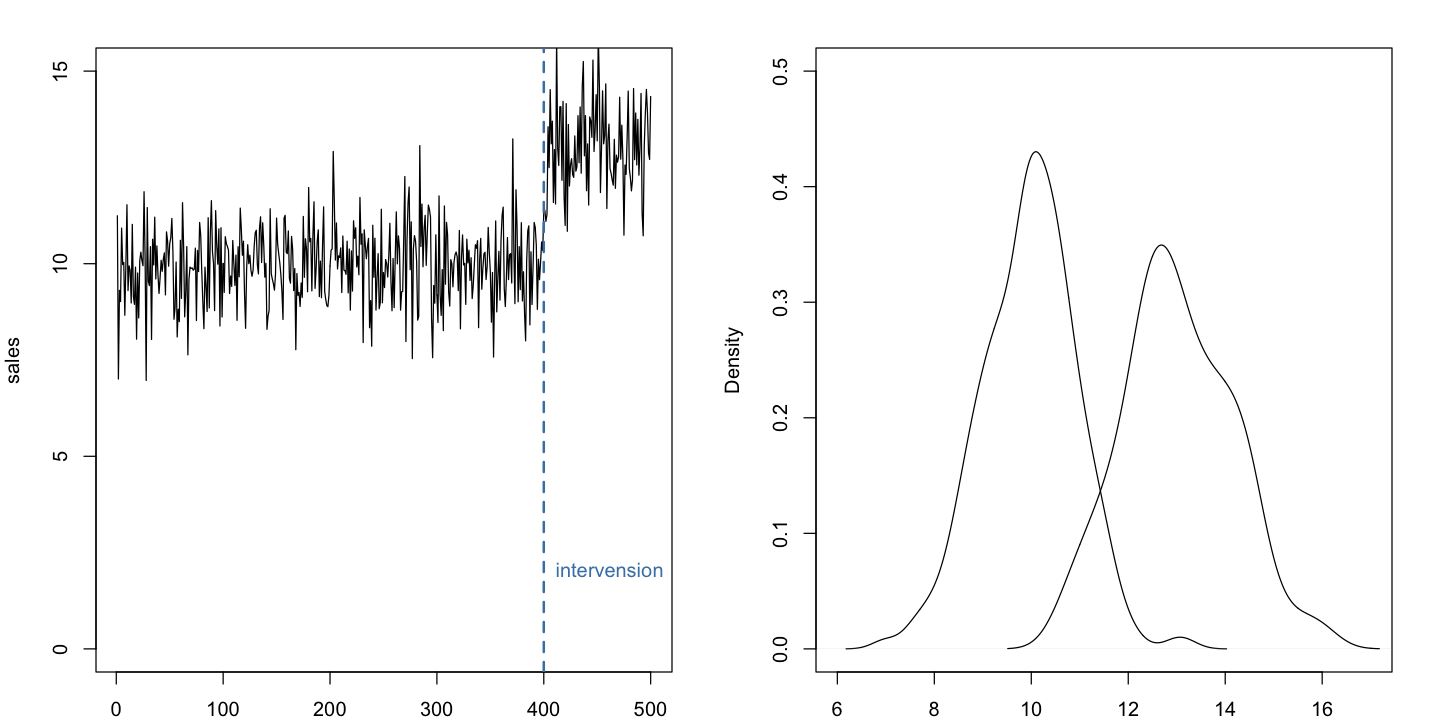

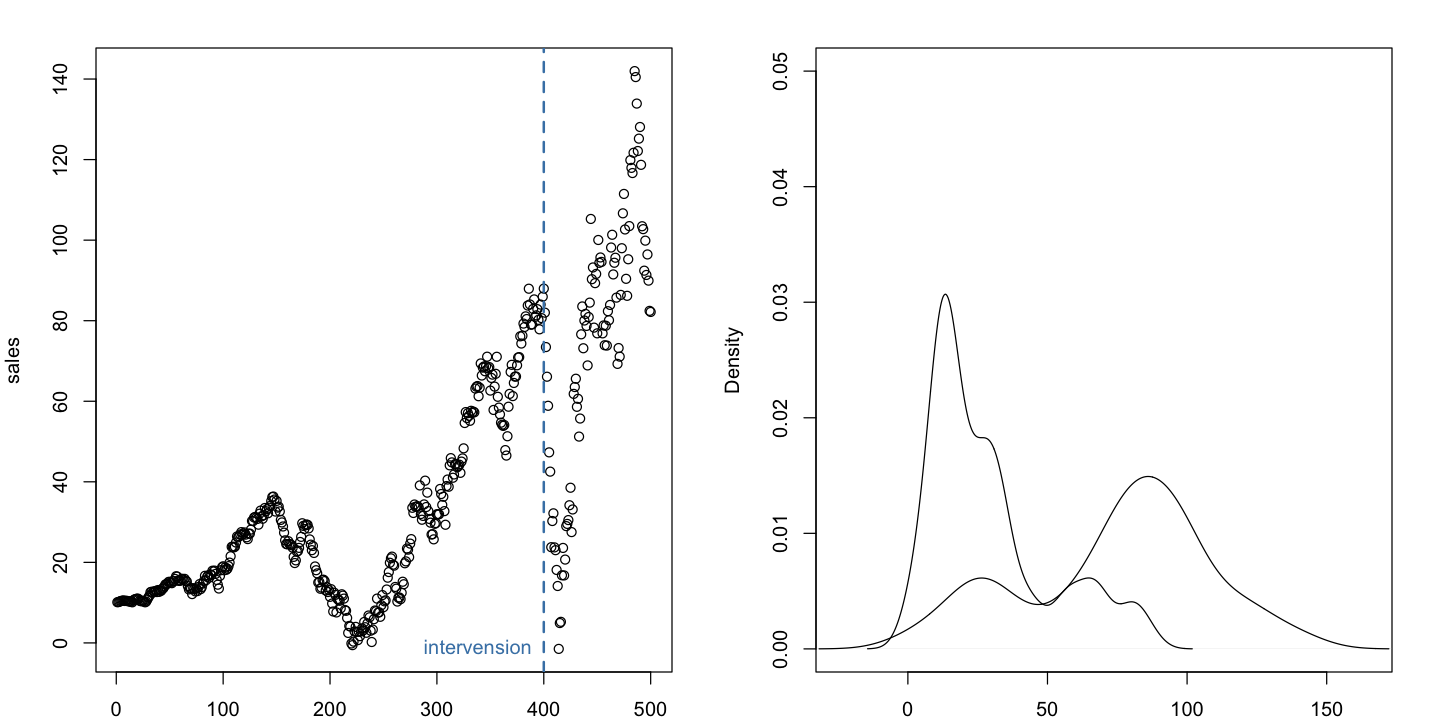

In [1]:
x <- 1:500
y1 <- 10+rnorm(400)
y2 <- 13+rnorm(100)
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2),mar = c(2,4,2,2))
plot(x,c(y1,y2),type='l',ylim=c(0,15),ylab="sales",xlab="time")
abline(v=400,lwd=2,lty=2,col="steelblue")
text(pos=4,400,2,"intervension",col="steelblue")
plot(density(y1),xlim=c(6,17),main="",xlab="x",ylim=c(0,.5))
lines(density(y2))

y_ar = rep(10,501)
for(t in 2:401){
    y_ar[t]=1.005*y_ar[t-1]+rnorm(1,0,t/100)
}
for(t in 402:501){
    y_ar[t]=(1.002*y_ar[t-1]+rnorm(1,0,t/50))
}

plot(y_ar[-1],ylab="sales")
abline(v=400,lwd=2,lty=2,col="steelblue")
text(pos=2,400,min(y_ar),"intervension",col="steelblue")
plot(density(y_ar),type='n',main="",xlab="x",ylim=c(0,0.05))
lines(density(y_ar[2:401]))
lines(density(y_ar[402:501]))




**위 그래프$(2 \times 2)$에서 데이터가 [1,1:2] 와 같다면 일반적인 t-검정을 할 수 있지만, 실제데이터는 [2,1:2] 와 같이 자기상관과 정상성이 존재**  
**$\therefore$ ITS analysis 를 적용해야함**

### 방법론
#### Single
: 시계열 예측 신뢰구간으로 intervension 이후 변화가 유의미한지 판단
1. Bayesian structual time series
2. etc

#### Comparative
1. Synthetic control
2. etc

## **Comparative**

## Synthetic Control Methods for Comparative

: 처리되지 않은 다른 unit의 가중합으로 counterfactual outcome을 추정하고 추정된 값을 통한 유효성 검정

### Model
$Y_{it}^N$ intervension 이 없었다는 가정의 결과(counterfactual outcome),  
$i$ 는 unit($i=1,\ldots,J+1$), $t$ 는 time($t=1,\ldots,T$)  
$T_0$ 는 intervension 시점 ($1<T_0 < T$)  
$Y_{it}^I$ intervension 이후 관측값  
만약 intervension의 효과가 없다면 $Y_{it}^I=Y_{it}^N$

Let $\alpha_{it}=Y_{it}^I-Y_{it}^N$  
$$Y_{it}=Y_{it}^N + \alpha_{it}D_{it}$$

\begin{equation}
  D_{it}=\begin{cases}
    1, & \text{if $i=1$ and $t>T_0$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

For $t>T_0$,우리는 이때 $\alpha_{1T_0+1},\cdots,\alpha_{1T}$ 를 추정하고 싶음
$$\alpha_{1t}=Y_{1t}^I-Y_{1t}^N=Y_{1t}-Y_{1t}^N$$
$\alpha_{1t}$:intervension 이 없다는 가정하의 결과(counterfactual outcome)와 intervension 이후 관측값의 차이

$Y_{1t}=Y_{1t}^I$ 는 관측값이고, 추정이 필요한 값은 $Y_{1t}^N$

$Y_{it}^N$ 을 factor model 가정
$$Y_{it}^N = \delta_t + \theta_t \mathbf Z_i + \lambda_t \mu_i + \varepsilon_{it},$$
$\mathbf Z_i$ is vector of observed covariates (not affected by the intervention) 

Consider vector of weights $\mathbf{W}=(w_2,\ldots,w_{J+1})'$ 이때 $w_j>0, w_2+\cdots+w_{J+1}=1$   
$$\sum^{J+1}_{j=2}w_jY_{jt}=\delta_t+\theta_t\sum^{J+1}_{j=2}w_j\mathbf Z_j + \lambda_t \sum^{J+1}_{j=2}w_j\mu_j+\sum^{J+1}_{j=2}w_j\varepsilon_{jt}$$
Suppose that there are $(w^*_2,\ldots,w^*_{J+1})$ such that  

$$\sum^{J+1}_{j=2}w_j^*Y_{j1}=Y_{11}, \sum^{J+1}_{j=2}w_j^*Y_{j2}=Y_{12},\cdots$$

\begin{align}
\sum^{J+1}_{j=2}w_j^*Y_{j1}=Y_{11},&\sum^{J+1}_{j=2}w_j^*Y_{j2}=Y_{12},&\cdots \\
\sum^{J+1}_{j=2}w_j^*Y_{j1}=Y_{13},&\text { and      } \sum^{J+1}_{j=2}w^*_j\mathbf Z_j=\mathbf Z_1 &
\end{align}




$$\hat \alpha_{1t}=Y_{1t}-\sum_{j=2}^{J+1}w^*_jY_{jt}$$
즉, $Y_{1t}^N$ 은 나머지 유닛들의 가중평균형태로 나타낼 수 있음  
$\therefore$ 적절한 $w^*_j$,where $(j=2,\ldots,J+1)$ 구하면 $\hat \alpha_{1t}$ 을 구할 수 있음 

### Estimate 
$\mathbf W = (w_2,\ldots,w_{J+1})'$ with $w_j \geq 0$ for $j=2,\ldots,J+1$, $\sum^{J+1}_{j=2}w_j=1$


Choose $\mathbf W$ to minimize $||X_1-X_0\mathbf W||$  
$X_1=(\mathbf Z_1',\bar Y^{K_1}_1,\ldots,\bar Y^{K_M}_1)$ : unit=1 의 특성벡터  
$X_0=(\mathbf Z_j',\bar Y^{K_1}_j,\ldots,\bar Y^{K_M}_j)$ : j번째 유닛의 특성벡터



### Inference 
추정된 $\alpha_{1t}$ 가 유의미한가에 대한 검정  
효과가 없다면 $\alpha_{1t}=0$ for every $t$

Albero(2010) adopt ratio of post/pre MSPE(Mean Squar Preiction Error) ratio



## Application
* Functions
 * dataprep() : Constructs a list of matrices from panel dataset to be loaded into synth()
   * usage :   
   dataprep(foo = NULL, predictors = NULL,  
   predictors.op = "mean", special.predictors = NULL,  
   dependent = NULL, unit.variable = NULL,time.variable = NULL, treatment.identifier = NULL,  
   controls.identifier = NULL, time.predictors.prior = NULL, time.optimize.ssr = NULL, time.plot = time.optimize.ssr,  
   unit.names.variable = NA)
     * foo : The dataframe with the panel data
     * predictors : the predictors' columns(numeric)
     * special.predictors : additional numeric predictors and their associated pre-treatment years and operators
     * dependent : dependent(outcome)
     * unit.variable : unit index
     * unit.name : unit name
     * time.variable : 
     * treatment.identfier : 처리군의 unit.variable
     * controls.identifier : 대조군의 unit.variables
     * time.optimize.ssr : 
     * time.plot : 
     * unit.names.variable : 
 * synth() : For any $V$ synth() finds a $\mathbf W ^*(V)$ 
   * usage : synth(data.prep.obj = NULL,X1 = NULL, X0 = NULL,Z0 = NULL, Z1 = NULL,custom.v = NULL,optimxmethod = c("Nelder-Mead", "BFGS"), genoud = FALSE, quadopt = "ipop", Margin.ipop = 5e-04,Sigf.ipop = 5, Bound.ipop = 10, verbose = FALSE, ...)
      * method : 최적화 알고리즘

### Sample Data

In [1]:
#install.packages('Synth')
library('Synth')
library('tidyverse')
data("basque")
#EDA
#dim(basque) #774*17
#basque[1:10,]

#dataset <- tbl_df(basque) %>% select(year,school.illit, school.prim, school.med,school.high,school.post.high,invest)%>%filter(year,)

dataset <- tbl_df(basque)

##
## Synth Package: Implements Synthetic Control Methods.

## See http://www.mit.edu/~jhainm/software.htm for additional information.


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] 18


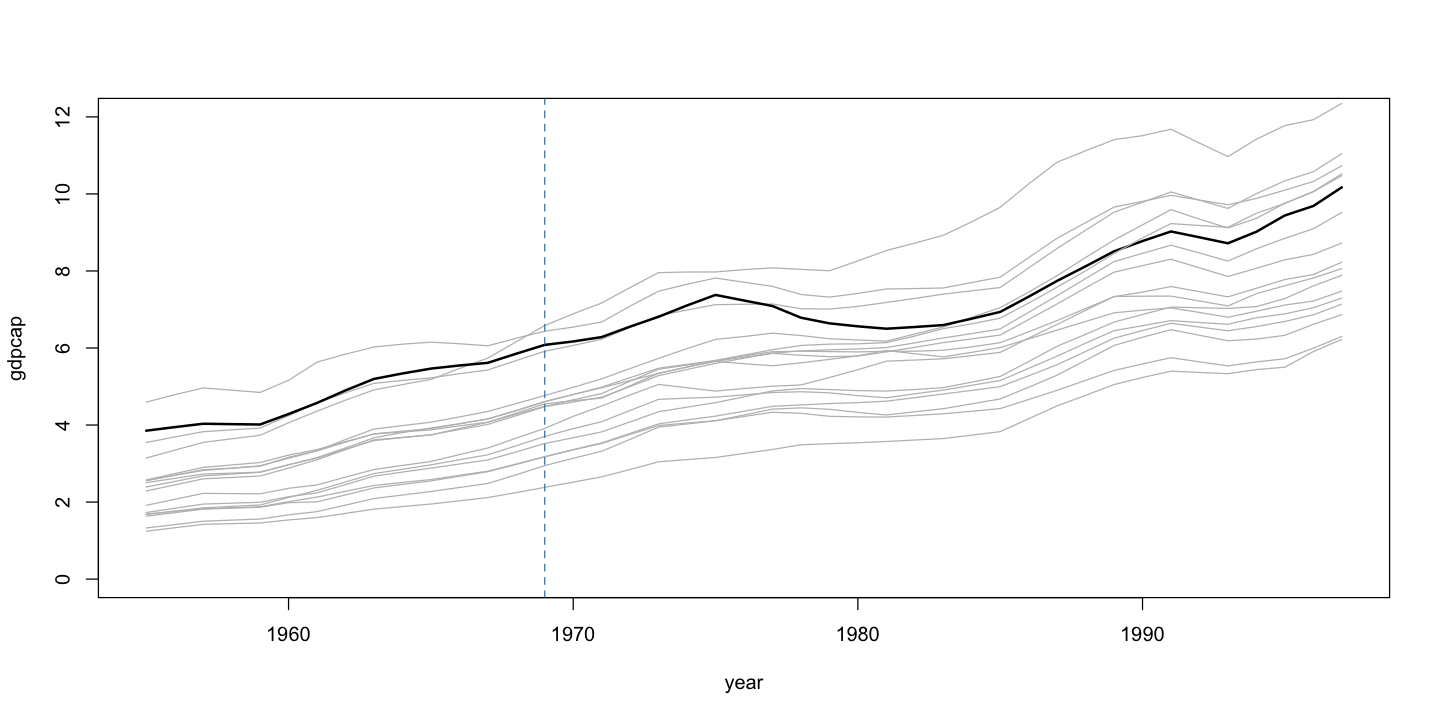

In [8]:
plotset <-dataset %>% filter(between(year,1955,1997))%>%select(regionno,regionname,year,gdpcap)
options(repr.plot.width=12, repr.plot.height=6)
plot(1955:1997,rep(0,length(1955:1997)),type='n',ylim=c(0,12),ylab='gdpcap',xlab="year")
for (i in 2:18){
    col="gray"
    lwd=1
    if(i ==17) {col="black";lwd=2}
    a <-plotset%>%filter(regionno==i)%>%select(year,gdpcap)
    lines(a%>%pull(year),a%>%pull(gdpcap),col=col,lwd=lwd)
}
    print(i)
abline(v=1969,col="steelblue",lty=2)

In [2]:
dataprep.out <- dataprep(foo = basque,
 predictors = c("school.illit", "school.prim", "school.med",
 "school.high", "school.post.high", "invest"),
 predictors.op = "mean", # the operator
 time.predictors.prior = 1964:1969, #the entire time frame from the #beginning to the end
 special.predictors = list(
 list("gdpcap", 1960:1969, "mean"),
 list("sec.agriculture", seq(1961,1969,2),"mean"),
 list("sec.energy",seq(1961,1969,2),"mean"),
 list("sec.industry", seq(1961,1969,2),"mean"),
 list("sec.construction", seq(1961,1969,2),"mean"),
 list("sec.services.venta", seq(1961,1969,2),"mean"),
 list("sec.services.nonventa",seq(1961,1969,2),"mean"),
 list("popdens", 1969, "mean")),
 dependent = "gdpcap", # dv
 unit.variable = "regionno",#identifying unit numbers
 unit.names.variable = "regionname",#identifying unit names
 time.variable = "year",#time-periods
 treatment.identifier = 17,#the treated case
 controls.identifier = c(2:16, 18),#the control cases; all others #except number 17
 time.optimize.ssr = 1960:1969,#the time-period over which to optimize
 time.plot = 1955:1997)#the entire time period before/after the treatment


#dataprep.out

In [3]:
synth.out = synth(data.prep.obj = dataprep.out, method = "BFGS")
gaps = dataprep.out$Y1plot-(dataprep.out$Y0plot%*% synth.out$solution.w)
gaps[1:3,1]


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.5571823 

solution.v:
 0.6510001 1.7902e-06 0.0004156427 0.189827 6.774e-07 0.1587548 

solution.w:
 2.2174e-06 4.70391e-05 5.7968e-06 3.7438e-05 9.9424e-06 0.6474861 5.12886e-05 1.23425e-05 8.287e-07 5.6331e-06 1.57444e-05 1.0362e-05 0.3221039 2.70368e-05 0.02699333 0.003191029 



1955      1956      1957 
0.6390370 0.5782009 0.5229546

In [4]:
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)
names(synth.tables)

[1] "tab.pred" "tab.v"    "tab.w"    "tab.loss"

In [5]:
synth.tables$tab.pred[,]
synth.tables$tab.w[,]

,Treated,Synthetic,Sample Mean
school.illit,39.888,49.393,170.786
school.prim,1031.742,793.603,1127.186
school.med,90.359,103.160,76.260
school.high,25.728,25.040,24.235
school.post.high,13.480,20.576,13.478
invest,24.647,24.654,21.424


,w.weights,unit.names,unit.numbers
2,0.000,Andalucia,2
3,0.000,Aragon,3
4,0.000,Principado De Asturias,4
5,0.000,Baleares (Islas),5
6,0.000,Canarias,6
7,0.647,Cantabria,7
8,0.000,Castilla Y Leon,8
9,0.000,Castilla-La Mancha,9
10,0.000,Cataluna,10
11,0.000,Comunidad Valenciana,11


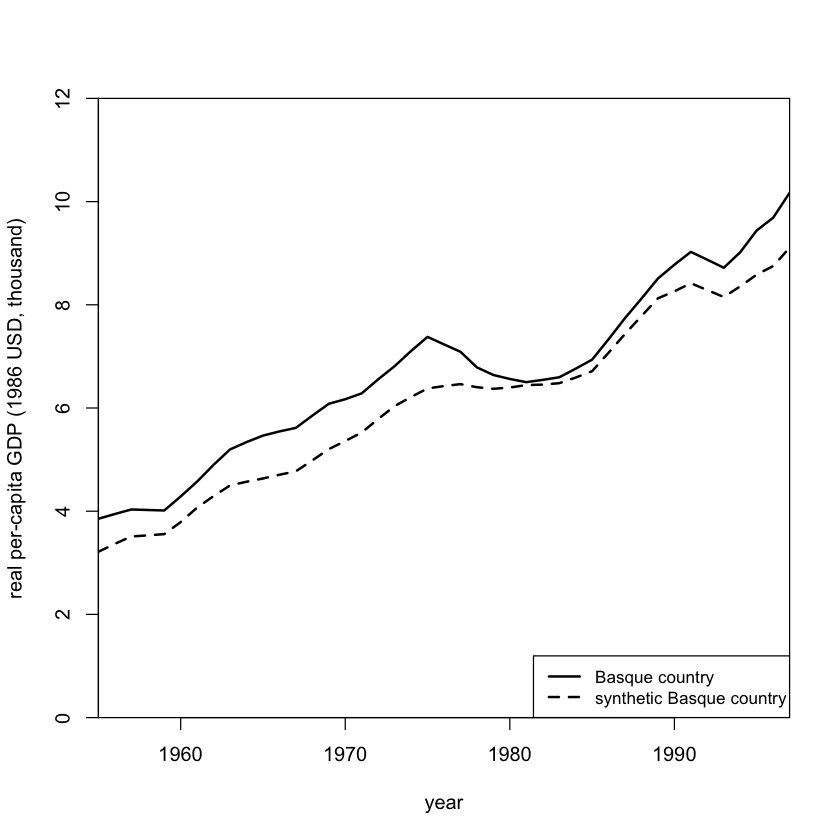

In [6]:
path.plot(synth.res = synth.out, dataprep.res = dataprep.out, Ylab = "real per-capita GDP (1986 USD, thousand)", Xlab = "year", Ylim = c(0, 12), Legend = c("Basque country", "synthetic Basque country"), Legend.position = "bottomright")

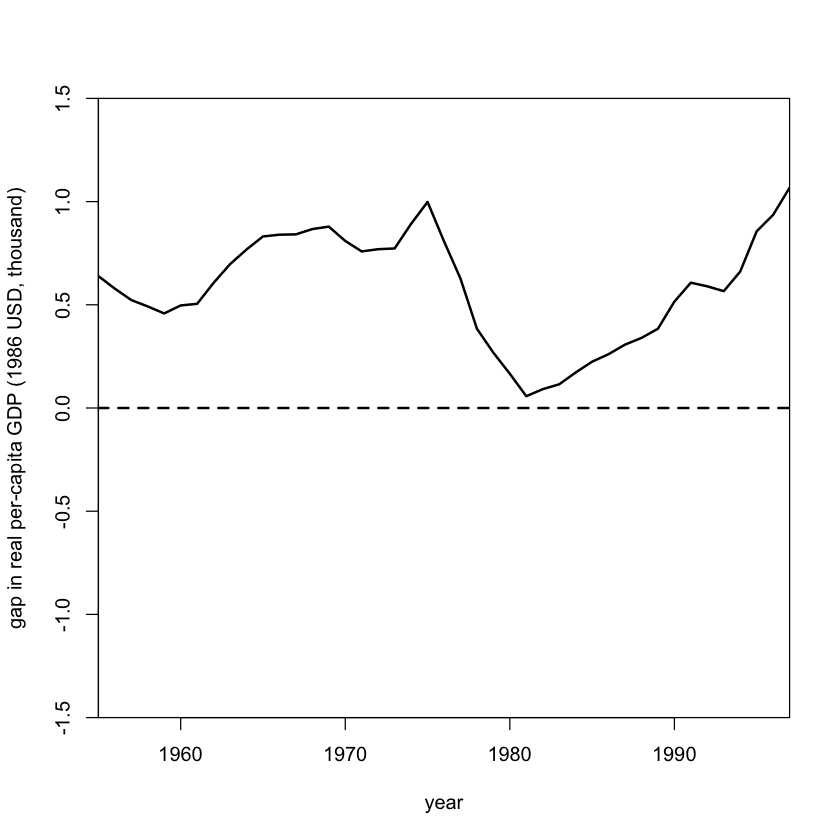

In [7]:
gaps.plot(synth.res = synth.out, dataprep.res = dataprep.out, Ylab = "gap in real per-capita GDP (1986 USD, thousand)", Xlab = "year", Ylim = c(-1.5, 1.5), Main = NA)

In [16]:
control_indentifier<-c(2:16,18)
pred<-list()
Y1plot<-list()
for(i in 2:18){
    input_identifier <- control_indentifier[-which(control_indentifier==i)]
    if(i==17){input_identifier=control_indentifier}
    dataprep.out <- dataprep(foo = basque,
 predictors = c("school.illit", "school.prim", "school.med",
 "school.high", "school.post.high", "invest"),
 predictors.op = "mean", # the operator
 time.predictors.prior = 1964:1969, #the entire time frame from the #beginning to the end
 special.predictors = list(
 list("gdpcap", 1960:1969, "mean"),
 list("sec.agriculture", seq(1961,1969,2),"mean"),
 list("sec.energy",seq(1961,1969,2),"mean"),
 list("sec.industry", seq(1961,1969,2),"mean"),
 list("sec.construction", seq(1961,1969,2),"mean"),
 list("sec.services.venta", seq(1961,1969,2),"mean"),
 list("sec.services.nonventa",seq(1961,1969,2),"mean"),
 list("popdens", 1969, "mean")),
 dependent = "gdpcap", # dv
 unit.variable = "regionno",#identifying unit numbers
 unit.names.variable = "regionname",#identifying unit names
 time.variable = "year",#time-periods
 treatment.identifier = i,#the treated case
 controls.identifier = input_identifier,#the control cases; all others #except number 17
 time.optimize.ssr = 1960:1969,#the time-period over which to optimize
 time.plot = 1955:1997)#the entire time period before/after the treatment
synth.out = synth(data.prep.obj = dataprep.out, method = "BFGS")
gaps = dataprep.out$Y1plot-(dataprep.out$Y0plot%*% synth.out$solution.w)
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)
#path.plot(synth.res = synth.out, dataprep.res = dataprep.out, Ylab = "real per-capita GDP (1986 USD, thousand)", Xlab = "year", Ylim = c(0, 12), Legend = c("Basque country", "synthetic Basque country"), Legend.position = "bottomright")
#gaps.plot(synth.res = synth.out, dataprep.res = dataprep.out, Ylab = "gap in real per-capita GDP (1986 USD, thousand)", Xlab = "year", Ylim = c(-1.5, 1.5), Main = NA)
pred[[i]]<-dataprep.out$Y0plot%*%synth.out$solution.w
Y1plot[[i]] <-dataprep.out$Y1plot
}


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.001123037 

solution.v:
 0.241915 0.004561015 0.0005982164 0.0004798833 0.001241421 0.01513177 0.3234859 0.01630921 0.02052098 0.1785447 0.004229041 0.006081587 0.09511713 0.09178419 

solution.w:
 3.1e-09 1.9e-09 3e-09 5.1e-09 1.4e-09 3.6e-09 0.4744106 6.396e-07 0.1323778 0 0.3932067 4.3205e-06 3.9e-09 2.1e-09 2.1e-09 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0004541524 

solution.v:
 0.08267331 0.06594578 0.02398611 0.04779584 0.008001925 1.11834e-05 0.103697 0.02191164 0.09064807 0.2916938 0.01780943 6.49292e-05 0.2402948 0.005466135 

solution.w:
 0.02222183 0.1749036 0.08787857 2.1534e-06 0.0004518103 0.1272828 0.0003200418 0.0009072008 0.000489

numeric(0)

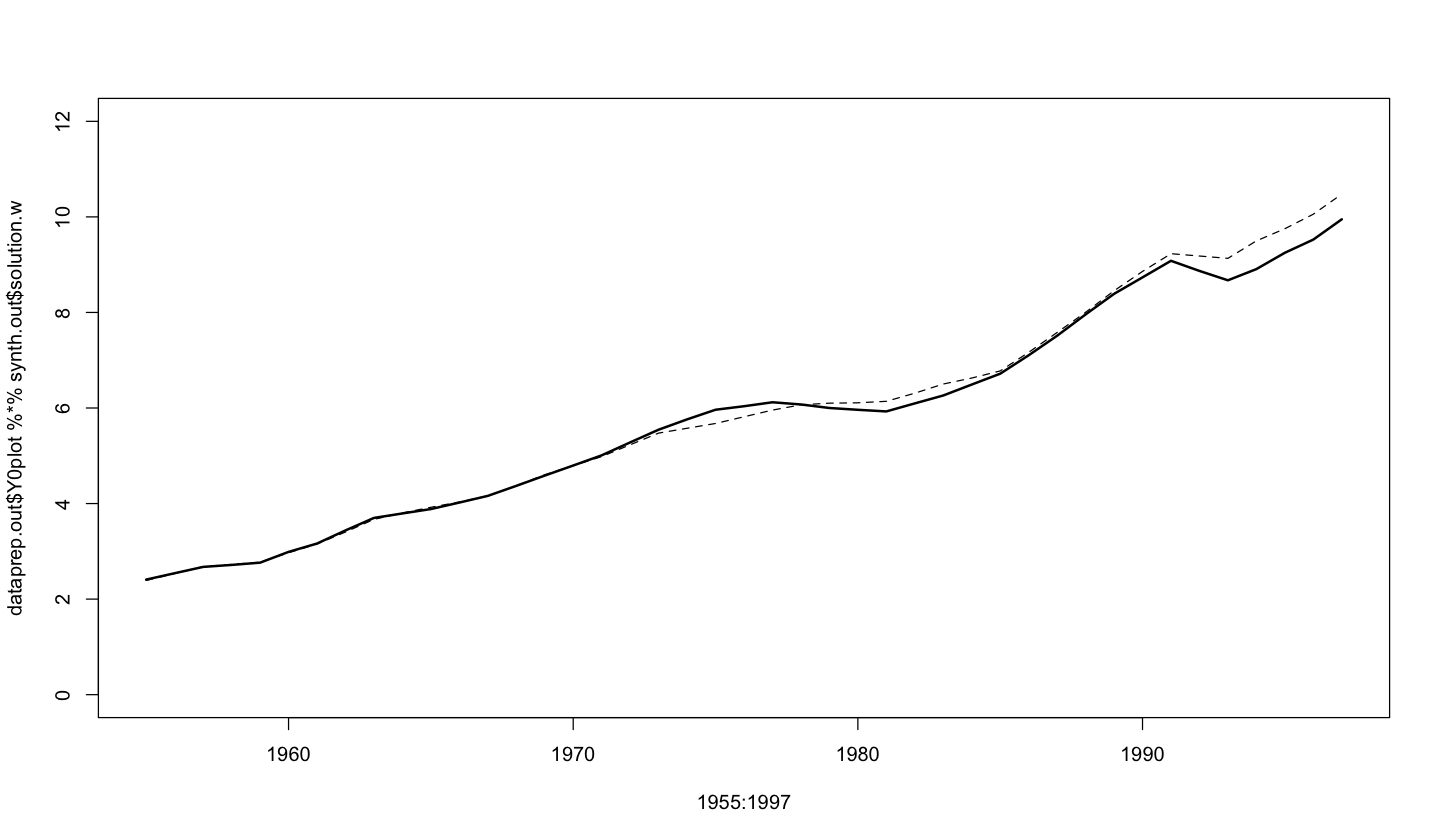

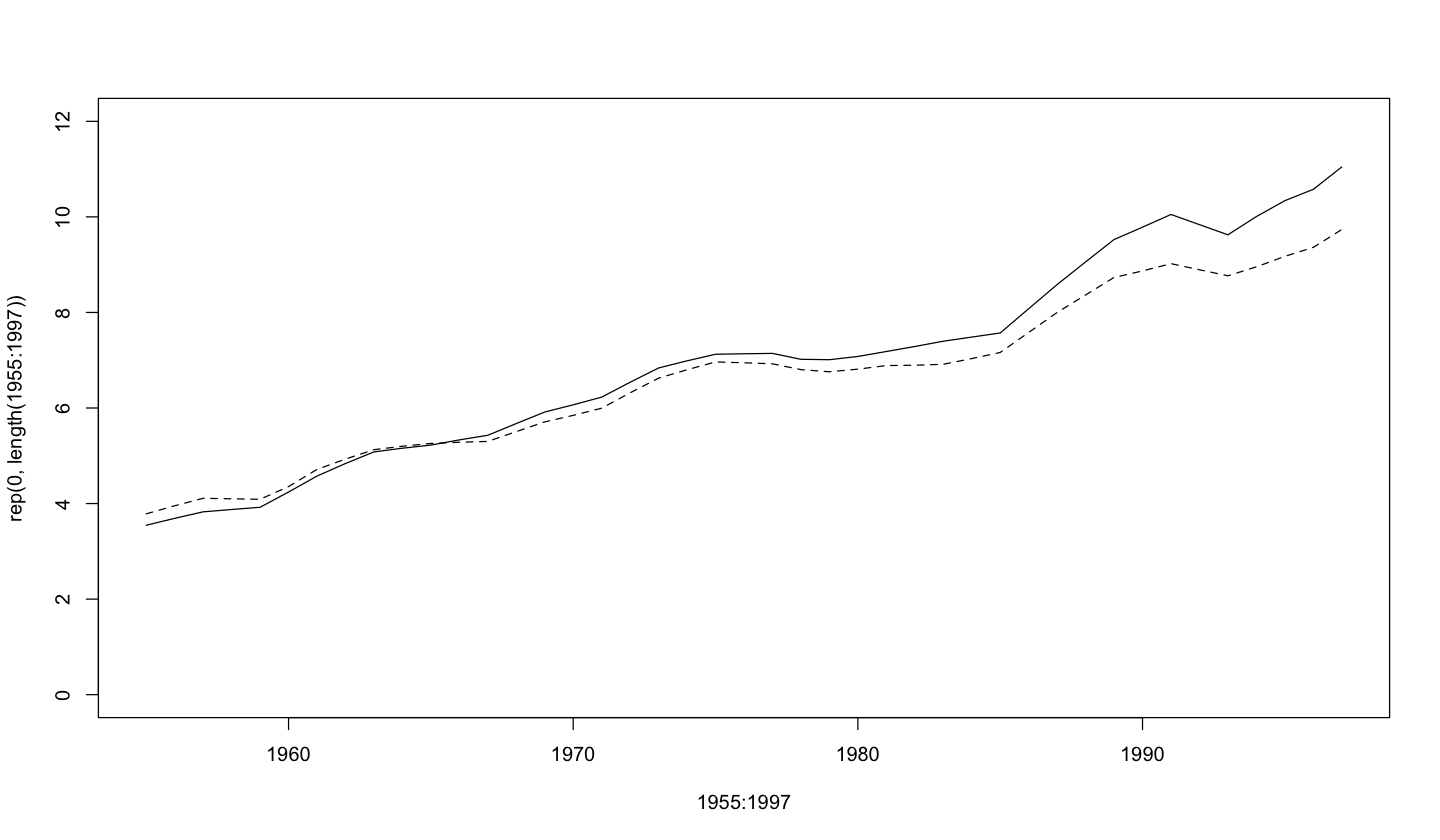

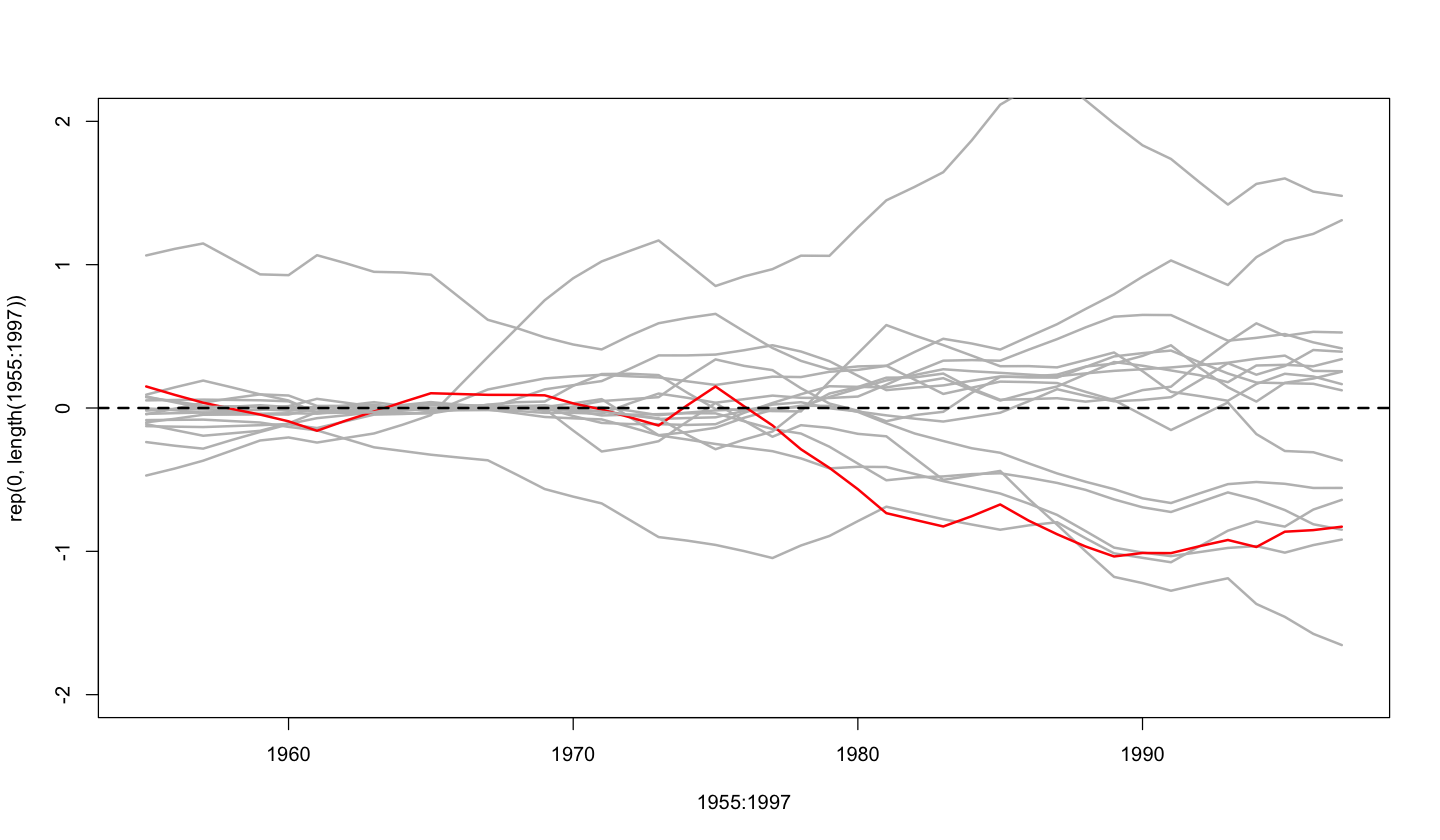

In [23]:
options(repr.plot.width=12, repr.plot.height=7)
plot(1955:1997,dataprep.out$Y0plot%*%synth.out$solution.w,ylim=c(0,12),type="l",lwd=2)
lines(1955:1997,dataprep.out$Y1plot,lty=2)

#dataprep.out$Y1plot
#pred

control_indentifier[-which(control_indentifier==17)]

plot(1955:1997,rep(0,length(1955:1997)),ylim=c(0,12),type="n",lwd=2)
lines(1955:1997,unlist(Y1plot[10]))
lines(1955:1997,unlist(pred[10]),lty=2)

plot(1955:1997,rep(0,length(1955:1997)),ylim=c(-2,2),type="n",lwd=2)
for(i in 2:18){
    col="gray"
    if(i==17)col="red"
    lines(1955:1997,unlist(Y1plot[i])-unlist(pred[i]),lwd=2,col=col)
}
abline(h=0,lty=2,lwd=2)

### Real Data

In [9]:
source('/Users/yimdh/github/ridi/source/Athena_connection.r')
library(DT)
library(tidyverse)
library('Synth')

Loading required package: DBI
Loading required package: rJava


example : dbGetQuery(con,sql)

In [20]:
sql<-read_file('sql')
raw<-tbl_df(dbGetQuery(con,sql))

ERROR: Error in filter(start_date >= "2020-05-06"): 객체 'start_date'를 찾을 수 없습니다


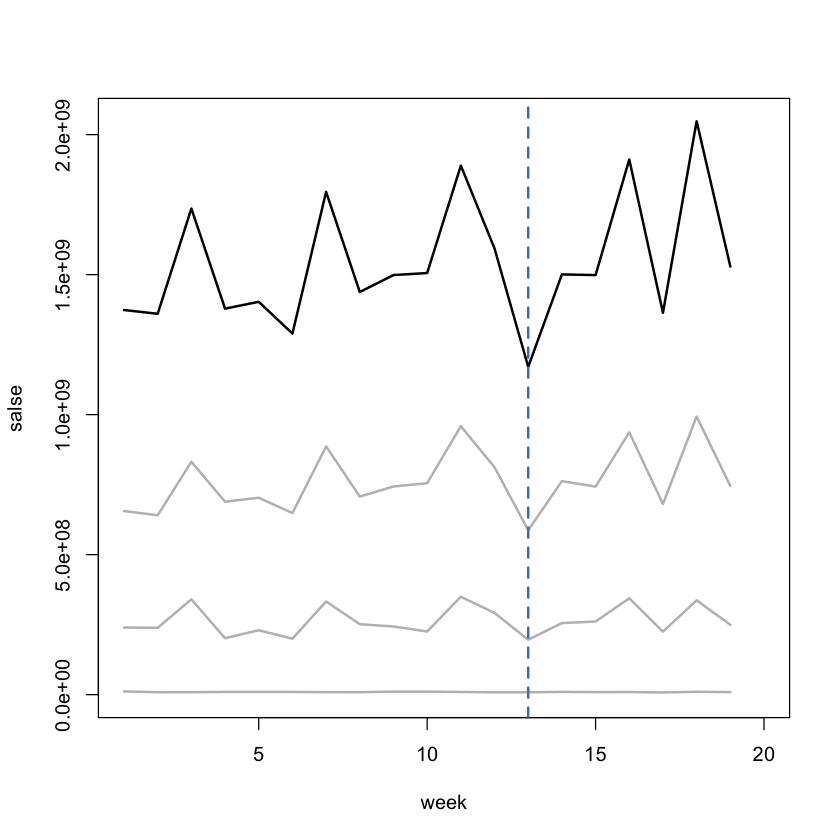

In [34]:
raw<-raw%>%filter(start_date <= '2020-05-06')
raw$start_date<-as.factor(raw$start_date)
plot(1:20,rep(0,20),type='n',ylim=c(0,max(raw$sales)),ylab='salse',xlab='week')
for(i in unique(raw$device))
    { 
    col='gray'
    if (i=='Android') col='black'
    subset<-raw%>%filter(device==i)
    lines(subset$temp,subset$sales,col=col,lwd=2)
    
}
abline(v=13,lty=2,lwd=2,col='steelblue')

Parsed with column specification:
cols(
  start_date = col_date(format = ""),
  device = col_character(),
  uv = col_double()
)
Joining, by = c("device", "start_date")


device,temp,start_date,sales,cnt,ya15,uv,deviceno
PAPER,1,2020-01-01,11592354,7,0,13058,4
Android,1,2020-01-01,1373700197,7,0,228699,1
iOS,1,2020-01-01,655784640,7,0,99203,2
PC,1,2020-01-01,239804727,7,0,50797,3
PAPER,2,2020-01-08,8771032,7,0,11517,4
iOS,2,2020-01-08,640708788,7,0,95009,2


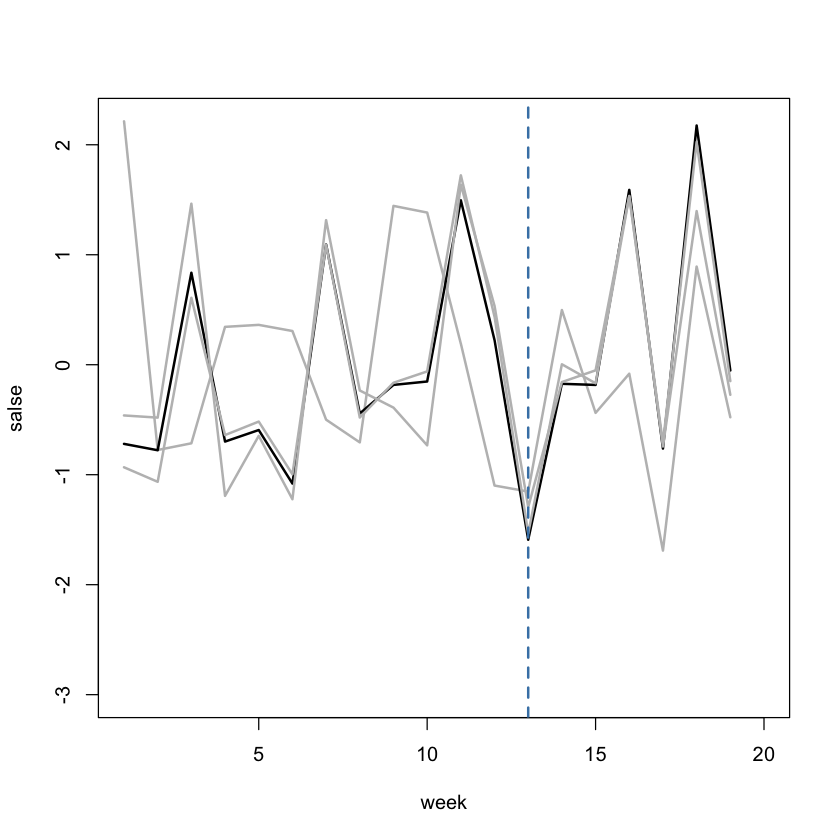

In [145]:
ya15<-raw%>% select(start_date) %>% distinct() 
ya15$ya15 <- c(0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0)
uv<-read_csv('uv.csv',col_names=c('start_date','device','uv'))
uv$start_date <- as.factor(uv$start_date)
    uv<-uv %>% mutate(device=if_else(device=='pc','PC',device),deviceno=case_when(device=='PAPER'~4,device=='Android'~1,device=='PC'~3,device=='iOS'~2))
ya15<-left_join(ya15,uv,by=c('start_date'))
dataset<-left_join(raw,ya15)
head(dataset)

normalize<-function(x){
    return((x-mean(x))/sd(x))
}

dataset<-dataset%>%group_by(deviceno)%>%mutate(salesz=normalize(sales),uvz=normalize(uv))

plot(1:20,rep(0,20),type='n',ylim=c(-3,max(dataset$salesz)),ylab='salse',xlab='week')
for(i in unique(dataset$device))
    { 
    subset<-dataset%>%filter(device==i)
    col='gray'
    if (i=='Android') {col='black';    #lines(subset$temp,subset$uvz,col='red')
                      }
    lines(subset$temp,subset$salesz,col=col,lwd=2)

    
}
abline(v=13,lty=2,lwd=2,col='steelblue')


In [175]:
dataset2 <- dataset%>%select(-start_date,-ya15)
dataprep.out <- dataprep(foo = as.data.frame(dataset2),
 predictors = c("uvz"),
 predictors.op = "mean", # the operator
 time.predictors.prior = 1:19, #the entire time frame from the #beginning to the end
 special.predictors = list(
 list("sales", 1:19, "mean")),
 dependent = "salesz", # dv
 unit.variable = "deviceno",#identifying unit numbers
 unit.names.variable = "device",#identifying unit names
 time.variable = "temp",#time-periods
 treatment.identifier = 1,#the treated case
 controls.identifier = c(2,3,4),#the control cases; all others #except number 17
 time.optimize.ssr = 1:13,#the time-period over which to optimize
 time.plot = 1:19)

In [176]:
synth.out = synth(data.prep.obj = dataprep.out, method = "BFGS")
synth.out
gaps = dataprep.out$Y1plot-(dataprep.out$Y0plot%*% synth.out$solution.w)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.02221204 

solution.v:
 0.3616723 0.6383277 

solution.w:
 0.9746926 0 0.02530739 



$solution.v
                  uvz special.sales.1.19
Nelder-Mead 0.3616723          0.6383277

$solution.w
      w.weight
2 9.746926e-01
3 6.635744e-13
4 2.530739e-02

$loss.v
           1
1 0.02221204

$loss.w
         w.weight
w.weight 1.900502

$custom.v
NULL

$rgV.optim
$rgV.optim$out.list
                    p1        p2      value fevals gevals niter convcode kkt1
Nelder-Mead  0.4063768 0.7172281 0.02221204     55     NA    NA        0   NA
BFGS        -0.8765598 1.8067731 0.02355373    100    100    NA        1   NA
            kkt2 xtime
Nelder-Mead   NA 0.144
BFGS          NA 0.785

$rgV.optim$par
                   p1        p2
Nelder-Mead 0.4063768 0.7172281

$rgV.optim$value
[1] 0.02221204

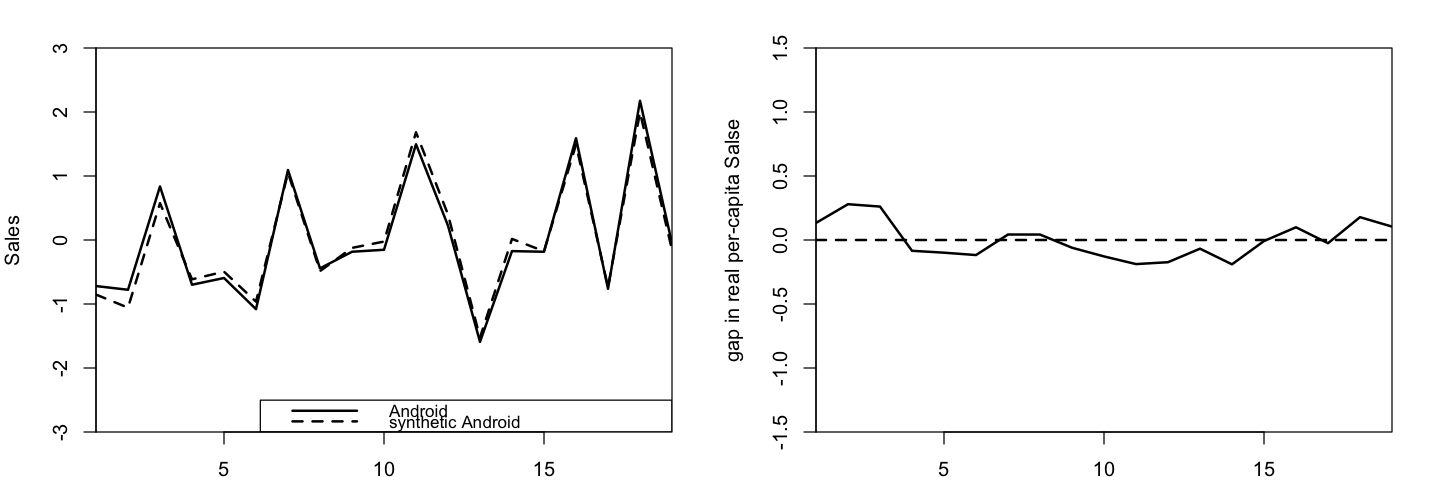

In [177]:
par(mfrow=c(1,2),mar = c(2,4,2,2))
options(repr.plot.width=12, repr.plot.height=4)
path.plot(synth.res = synth.out, dataprep.res = dataprep.out, Ylab = "Sales", Xlab = "year", Ylim=c(-3,3),Legend = c("Android", "synthetic Android"), Legend.position = "bottomright")
gaps.plot(synth.res = synth.out, dataprep.res = dataprep.out, Ylab = "gap in real per-capita Salse", Xlab = "year", Ylim = c(-1.5, 1.5), Main = NA)

In [156]:
control_indentifier<-c(2,3,4)
pred<-list()
Y1plot<-list()
for(i in 1:4){
    input_identifier <- control_indentifier[-which(control_indentifier==i)]
    if(i==1){input_identifier=control_indentifier}
    dataprep.out <- dataprep(foo = as.data.frame(dataset2),
     predictors = c("uvz"),
     predictors.op = "mean", # the operator
     time.predictors.prior = 1:19, #the entire time frame from the #beginning to the end
     special.predictors = list(
     list("sales", 1:19, "mean")),
     dependent = "salesz", # dv
     unit.variable = "deviceno",#identifying unit numbers
     unit.names.variable = "device",#identifying unit names
     time.variable = "temp",#time-periods
     treatment.identifier = i,#the treated case
     controls.identifier = input_identifier,#the control cases; all others #except number 17
     time.optimize.ssr = 1:13,#the time-period over which to optimize
     time.plot = 1:19)
    synth.out = synth(data.prep.obj = dataprep.out, method = "BFGS")
    gaps = dataprep.out$Y1plot-(dataprep.out$Y0plot%*% synth.out$solution.w)
    synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)
    pred[[i]]<-dataprep.out$Y0plot%*%synth.out$solution.w
    Y1plot[[i]] <-dataprep.out$Y1plot
}


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.02221204 

solution.v:
 0.3616723 0.6383277 

solution.w:
 0.9746926 0 0.02530739 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.1358544 

solution.v:
 0.8415196 0.1584804 

solution.w:
 0.8679891 0.1320109 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.1812189 

solution.v:
 0.9987956 0.001204394 

solution.w:
 1 3.2e-08 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 2.

[1]  0.471304561  0.583640469  0.855508974 -0.552868780 -0.129819875
 [6] -0.226944411  0.224451498  0.246006125 -0.226009657 -0.672096889
[11] -0.084943700  0.098335050  0.237880917 -0.161837213  0.117721700
[16]  0.003772305 -0.031087225 -0.628337729 -0.124676120

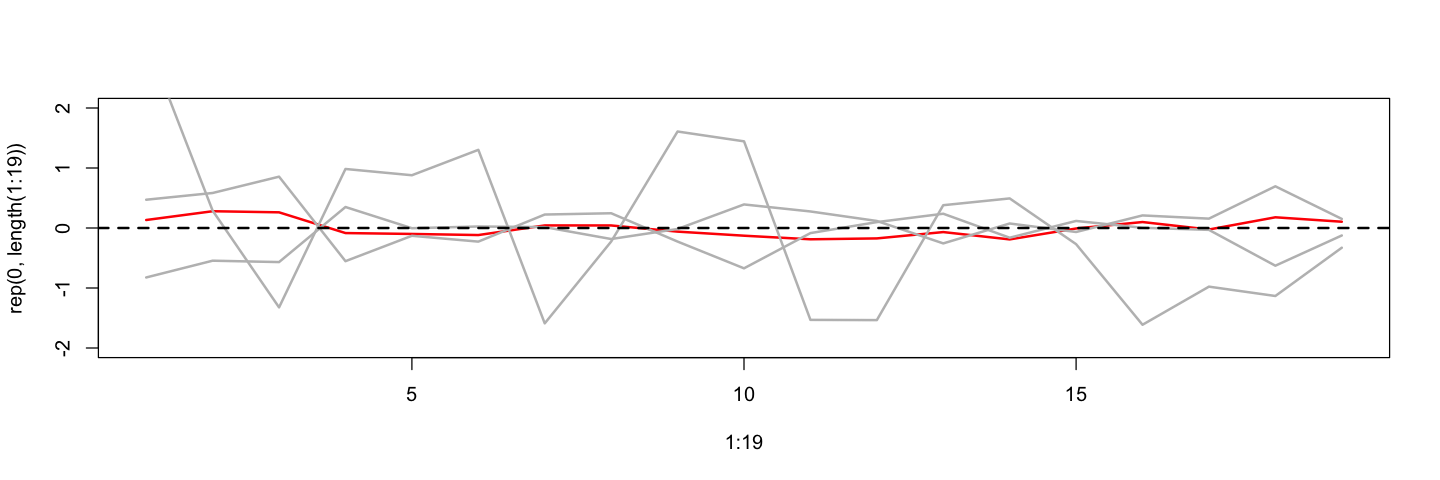

In [166]:
plot(1:19,rep(0,length(1:19)),ylim=c(-2,2),type="n")
for(i in 1:4){
    col="gray"
    if(i==1)col="red"
    lines(1:19,unlist(Y1plot[i])-unlist(pred[i]),lwd=2,col=col)
}
abline(h=0,lty=2,lwd=2)

unlist(Y1plot[3])-unlist(pred[3])


### Bayesian structual time series

y,x1
105.2950,88.21513
105.8943,88.48415
106.6209,87.87684
106.1572,86.77954
101.2812,84.62243
101.4484,84.60650


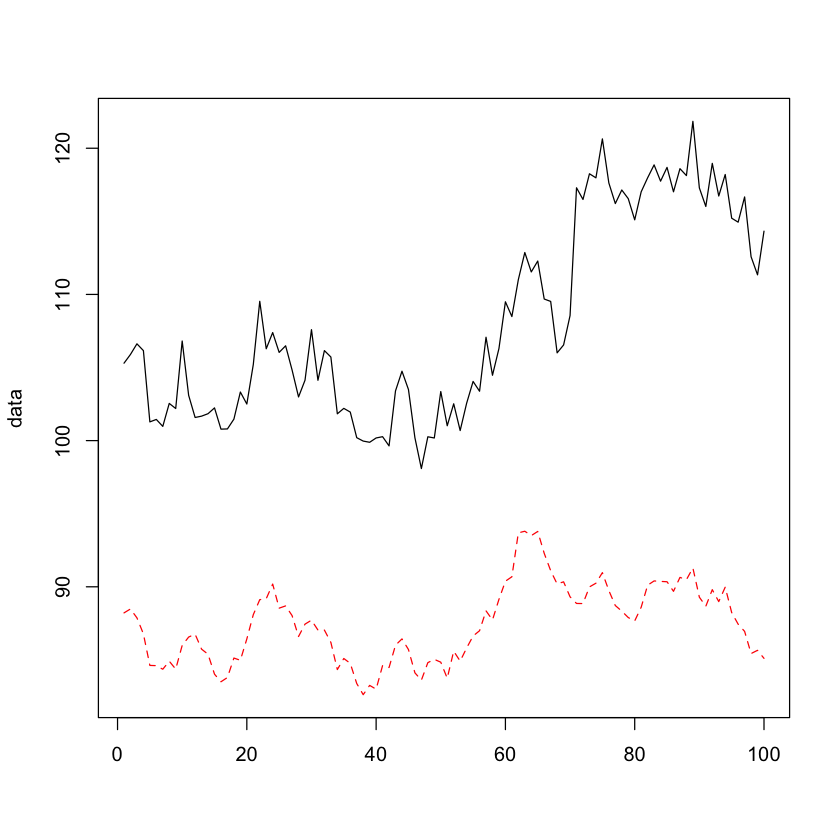

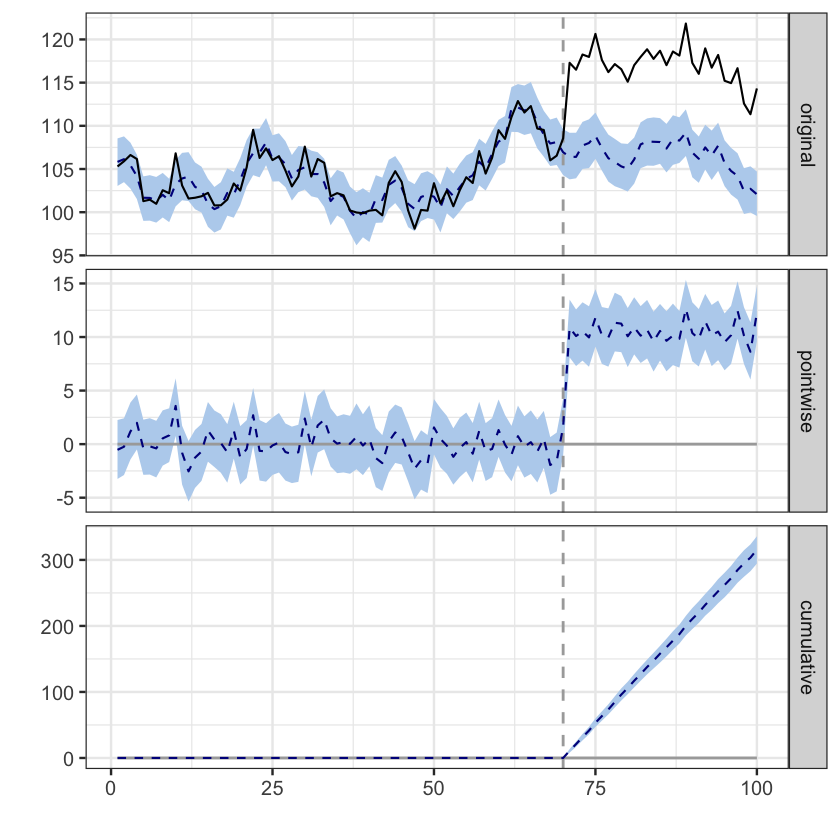

In [6]:
#install.packages("CausalImpact",dependencies=TRUE)
library(CausalImpact)
set.seed(1)
x1 <- 100 + arima.sim(model = list(ar = 0.999), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 10
data <- cbind(y, x1)

head(data)
matplot(data, type = "l")

pre.period <- c(1, 70)
post.period <- c(71, 100)

impact <- CausalImpact(data, pre.period, post.period)
plot(impact)